0.10410160316468874
escape 0.266 sec.


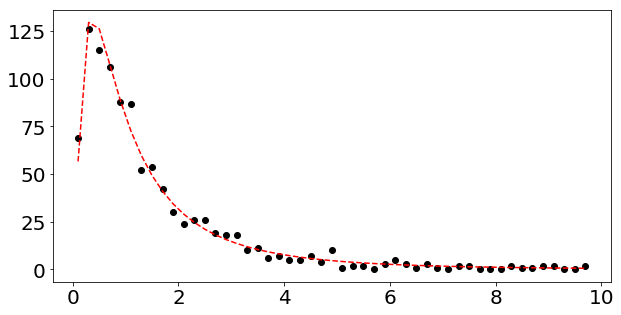

In [1]:
#draw random sample from a generalized PDF
#A. logNormal

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
#parameter of the logNormal density
sig = 1.
mu = 0.

#define the target function p(x)
def lognorm(x,mu,sig):
    return 1./(np.sqrt(2*np.pi)*sig*x)*np.exp(-(np.log(x)-mu)**2/(2*sig**2))

start = time.time()
N = 1000                             #generate 1000 accepted samples
i = 0                                #count the number of accepted samples
k = 0                                #count the number of all generated samples
x = np.zeros((N,1))                  #store the accepted samples
#rejection sampling, use uniform distribution as approximate function
while i<N:
    x0 = np.random.uniform(0,10.)    #use approximate function g(x) to generate samples
    y0 = np.random.rand()            #random number from uniform [0,1), use as rejection basis
    y1 = lognorm(x0,mu,sig)          #calculate p(x)
    if y0<=y1:                       #rejection process  
        x[i] = x0
        i += 1                       #accepted number +1
    k += 1                           #generated number +1
#analyze the samples in histogram
xgrid = np.arange(0,10,0.2)
xcenter = (xgrid[:-1]+xgrid[1:])/2.
hx,xedge = np.histogram(x,xgrid)
#calculate the density function analytically
y = lognorm(xcenter,mu,sig)
#draw histogram and compare with the analytic density curve
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
ax.plot(xcenter,hx,'ko')                    #the result of histogram
ax.plot(xcenter,y/np.sum(y)*sum(hx),'r--')  #the density curve of target function
#show the acception rate
print (N/np.float(k))
#show the running time interval
print ('escape %(s).3f sec.' % {'s':time.time()-start})

0.03933291378225299


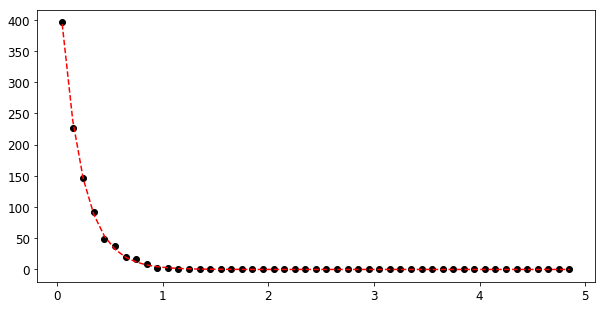

In [2]:
#draw random sample from an exponential PDF
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

#parameter of the exponential density
h = 0.2

#define the density function
def exponential(x,h):
    return 1./h*np.exp(-x/h)

#draw 1000 random samples
N = 1000

#rejection sampling
i = 0
k = 0
x = np.zeros((N,1))
while i<N:
    x0 = np.random.uniform(0,5.)        #use approximate function g(x) to generate samples
    y0 = np.random.rand()/h             #random number from uniform [0,1/h), use as rejection basis
    y1 = exponential(x0,h)              #calculate p(x)
    if y0<=y1:                          #rejection process
        x[i] = x0
        i += 1
    k += 1

#analyze the samples in histogram
xgrid = np.arange(0,5,0.1)
xcenter = (xgrid[:-1]+xgrid[1:])/2.
hx,xedge = np.histogram(x,xgrid)

#calculate the density function analytically
y = exponential(xcenter,h)

#draw histogram and compare with the analytic density curve
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
ax.plot(xcenter,hx,'ko')
ax.plot(xcenter,y/np.sum(y)*sum(hx),'r--')

#show the acception rate
print (N/np.float(k))

0.25076435


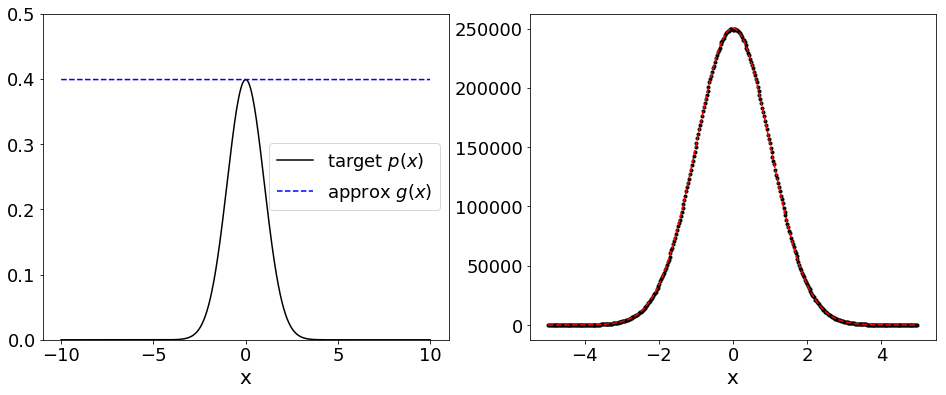

In [7]:
#rejection sampling using a Gaussian as a sample
import numpy as np
import scipy.stats as stats
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 

#solution 1: draw random numbers from approximate function of uniform distribution 

#step 1: set target function ans approximate function
#set variable x
xgrid = np.arange(-10,10,0.01)
xcenter = (xgrid[1:]+xgrid[:-1])/2. 
#set target function p(x)
y = stats.norm.pdf(xcenter,loc=0.,scale=1.)
#set approximate function g(x)
z_3 = np.repeat(1./(np.sqrt(2*np.pi)*1.),np.shape(y))
z = z_3
#show the figure of target function and approximate function
fig = plt.figure(figsize=[16,6])
ax = fig.add_subplot(121)
ax.plot(xcenter,y,'k-',label = 'target $p(x)$')
ax.plot(xcenter,z,'b--',label = 'approx $g(x)$')
ax.set_xlabel('x',fontsize = 20)
ax.set_ylim([0,0.5])
plt.legend(loc='best',fontsize = 18)


#step 2: rejection sampling
#generate N samples
N = 100000000
#rejection sampling
x_rand1 = np.random.uniform(-5.,5.,size=N)                     #use approximate function g(x) to generate samples
y_rand1 = np.random.uniform(0.,1./np.sqrt(2*np.pi),size=N)     #use as rejection basis
x = x_rand1[y_rand1<=stats.norm.pdf(x_rand1,loc=0.,scale=1.)]  #calculate p(x) and implement the rejection process
#analyze the samples in histogram
xgrid2 = np.arange(-5.,5.,0.025)
xcenter2 = (xgrid2[1:]+xgrid2[:-1])/2. 
hx2,xedge = np.histogram(x,xgrid2)
#calculate the density function analytically
y2 = stats.norm.pdf(xcenter2,loc=0.,scale=1.)
#draw histogram and compare with the analytic density curve
ax = fig.add_subplot(122)
ax.plot(xcenter2,hx2,'k.')
ax.plot(xcenter2,y2/sum(y2)*sum(hx2),'r--')      # translate the probability to frequency
ax.set_xlabel('x',fontsize = 20)
#show the acception rate
print (len(x)/float(N))

0.26469623


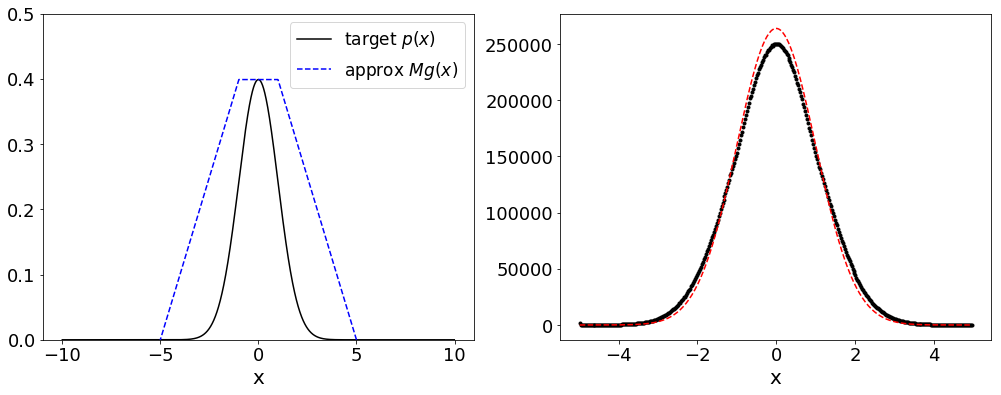

In [12]:
#solution 2: draw random numbers from approximate function of envelope

#step 1: set target function and approximate function
#set variable x
xgrid = np.arange(-10,10,0.01)
xcenter = (xgrid[1:]+xgrid[:-1])/2. 
#set target function p(x)
y = stats.norm.pdf(xcenter,loc=0.,scale=1.)
#set the segments surrounding p(x) as approximate function Mg(x)
z_1 = (xcenter+5.)/(-1.-(-5.))*(1./(np.sqrt(2*np.pi)*1.)-0.)+0.  #set straight line from (-5,0) to (-1,1./(np.sqrt(2*np.pi)))
z_2 = np.repeat(1./(np.sqrt(2*np.pi)*1.),np.shape(y))
z_3 = (xcenter-5.)/(1.-5.)*(1./(np.sqrt(2*np.pi)*1.)-0.)+0.      #set straight line from(1,1./(np.sqrt(2*np.pi))) to (5,0) 
#use z_1 in [-5,-1], z_2 in [-1,1], z_3 in [1,5]
z = z_1
z[(xcenter>-1.) & (xcenter<=1.)] = z_2[(xcenter>-1.) & (xcenter<=1.)]
z[(xcenter>1.)] = z_3[(xcenter>1.)]
#show the figure of target function and approximate function
fig = plt.figure(figsize = [17,6])
ax = fig.add_subplot(121)
ax.plot(xcenter,y,'k-',label = 'target $p(x)$')
ax.plot(xcenter,z,'b--',label = 'approx $Mg(x)$')
ax.set_xlabel('x',fontsize=20)
ax.set_ylim([0,0.5])
plt.legend(loc='best',fontsize = 17)

#step 2: rejection sampling
'''
wrong version
'''
#generate N samples
N=100000000
#rejection sampling 
x_rand1 = np.random.uniform(-5,5,size=N)                   #generate samples (not exactly according to g(x)，WRONG!!!)
y_rand = stats.norm.pdf(x_rand1,loc=0.,scale=1.)           #calculate p(x)
fz = interp1d(xcenter,z,kind='cubic')                      #linear interpolation of Mg(x) to facilitate Mg(x) calculation
Q = y_rand/fz(x_rand1)                                     #normalize p(x)/Mg(x) to facilitate rejection
x_rand2 = np.random.uniform(0.,1.,size=np.shape(x_rand1))  #random number from uniform [0,1), use as rejection basis
x = x_rand1[x_rand2<Q]                                     #rejection process
#analyze the samples in histogram
xgrid2 = np.arange(-5,5,0.025)
xcenter2 = (xgrid2[1:]+xgrid2[:-1])/2. 
hx2,xedge = np.histogram(x,xgrid2)
#calculate the density function analytically
y2 = stats.norm.pdf(xcenter2,loc=0.,scale=1.)
#draw histogram and compare with the analytic density curve
ax = fig.add_subplot(122)
ax.plot(xcenter2,hx2,'k.')
ax.plot(xcenter2,y2/sum(y2)*sum(hx2),'r--')         # translate the probability to frequency
ax.set_xlabel('x',fontsize = 20)
#show the acception rate
print (len(x)/float(N))

/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


0.41543


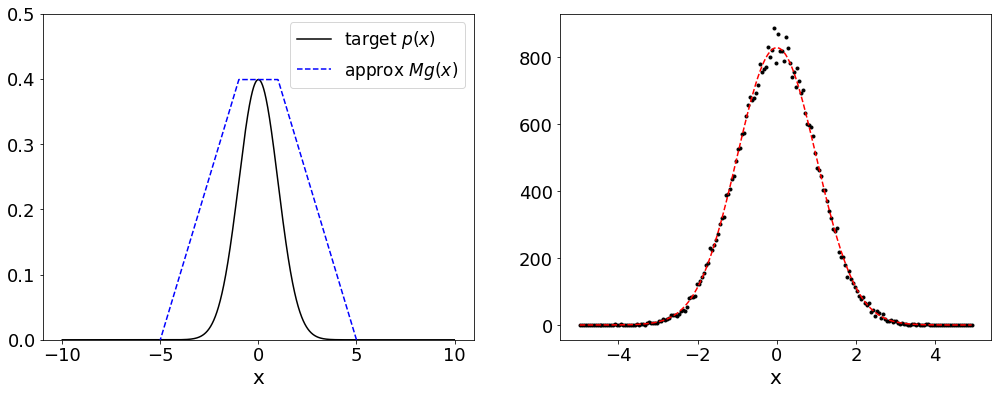

In [15]:
#solution 2-1: draw random numbers from approximate function of envelope
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.integrate as integrate
import scipy.stats as stats
from scipy.interpolate import interp1d

#step 1: set target function and approximate function
#set variable x
xgrid = np.arange(-10,10,0.01)
xcenter = (xgrid[1:]+xgrid[:-1])/2. 
#set target function p(x)
y = stats.norm.pdf(xcenter,loc=0.,scale=1.)
#set the segments surrounding p(x) as approximate function Mg(x)
z_1 = (xcenter+5.)/(-1.-(-5.))*(1./(np.sqrt(2*np.pi)*1.)-0.)+0.  #set straight line from (-5,0) to (-1,1./(np.sqrt(2*np.pi)))
z_2 = np.repeat(1./(np.sqrt(2*np.pi)*1.),np.shape(y))
z_3 = (xcenter-5.)/(1.-5.)*(1./(np.sqrt(2*np.pi)*1.)-0.)+0.      #set straight line from(1,1./(np.sqrt(2*np.pi))) to (5,0) 
#use z_1 in [-5,-1], z_2 in [-1,1], z_3 in [1,5]
z = z_1
z[(xcenter>-1.) & (xcenter<=1.)] = z_2[(xcenter>-1.) & (xcenter<=1.)]
z[(xcenter>1.)] = z_3[(xcenter>1.)]
#show the figure of target function and approximate function
fig = plt.figure(figsize = [17,6])
ax = fig.add_subplot(121)
ax.plot(xcenter,y,'k-',label = 'target $p(x)$')
ax.plot(xcenter,z,'b--',label = 'approx $Mg(x)$')
ax.set_xlabel('x',fontsize=20)
ax.set_ylim([0,0.5])
plt.legend(loc='best',fontsize = 17)

#step 2: rejection sampling
'''
corrected version
'''
#generate N samples
N=100000
 
#use cipy.stats.rv_continuous.rvs to generate distribution g for sampling                  
fz = interp1d(xcenter,z,kind='cubic')            #linear interpolation of Mg(x) to facilitate Mg(x) calculation
area = integrate.quad(lambda x:fz(x), -5, 5)     #integration for area of Mg(x), for normalization of g(x)
class g_envelope(stats.rv_continuous):
    def _pdf(self,x):
        return fz(x)/area[0]                     #normalization of g(x)
g = g_envelope(a = -5, b = 5, name='g')          #now g can be used for rvs,pdf,ppf,cdf etc.

#rejection sampling
x_rand1 = g.rvs(size=N)                                    #generate samples according to g(x)
y_rand = stats.norm.pdf(x_rand1,loc=0.,scale=1.)           #calculate p(x)
Q = y_rand/fz(x_rand1)                                     #normalize p(x)/Mg(x) to facilitate rejection
x_rand2 = np.random.uniform(0.,1.,size=np.shape(x_rand1))  #random number from uniform [0,1), use as rejection basis
x = x_rand1[x_rand2<Q]                                     #rejection process
#analyze the samples in histogram
xgrid2 = np.arange(-5,5,0.05)
xcenter2 = (xgrid2[1:]+xgrid2[:-1])/2. 
hx2,xedge = np.histogram(x,xgrid2)
#calculate the density function analytically
y2 = stats.norm.pdf(xcenter2,loc=0.,scale=1.)
#draw histogram and compare with the analytic density curve
ax = fig.add_subplot(122)
ax.plot(xcenter2,hx2,'k.')
ax.plot(xcenter2,y2/sum(y2)*sum(hx2),'r--')         # translate the probability to frequency
ax.set_xlabel('x',fontsize = 20)
#show the acception rate
print (len(x)/float(N))

/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


0.41963


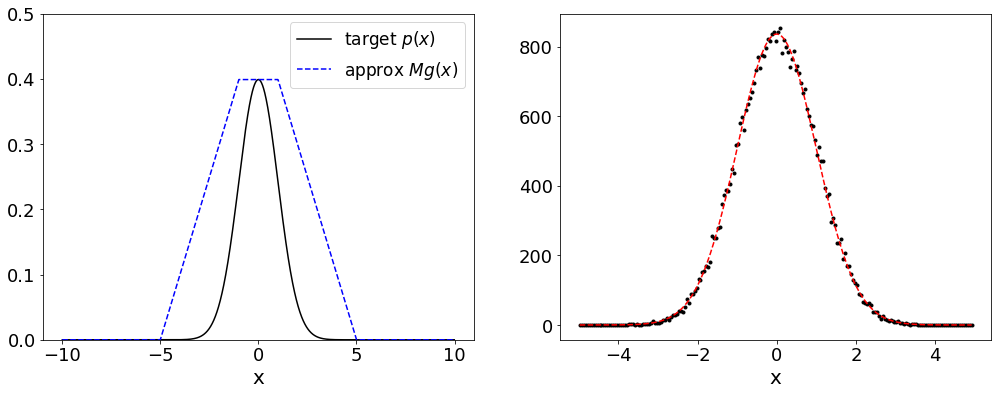

In [14]:
#solution 2-2: draw random numbers from approximate function of envelope

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.integrate as integrate
import scipy.stats as stats

#step 1: set target function and approximate function
#set variable x
xgrid = np.arange(-10,10,0.01)
xcenter = (xgrid[1:]+xgrid[:-1])/2. 
#set target function p(x)
y = stats.norm.pdf(xcenter,loc=0.,scale=1.)
#set the segments surrounding p(x) as approximate function Mg(x)
def fun_g (x):
    if x >=-5. and x <= -1.:
        g = (x+5)/(4*np.sqrt(2*np.pi))
    elif x >= -1. and x <= 1.:
        g = 1/(np.sqrt(2*np.pi))
    elif x >= 1. and x <= 5.:
        g = -(x-5)/(4*np.sqrt(2*np.pi))    
    else:
        g = 0
    return g
z = [fun_g(a) for a in xcenter]
#show the figure of target function and approximate function
fig = plt.figure(figsize = [17,6])
ax = fig.add_subplot(121)
ax.plot(xcenter,y,'k-',label = 'target $p(x)$')
ax.plot(xcenter,z,'b--',label = 'approx $Mg(x)$')
ax.set_xlabel('x',fontsize=20)
ax.set_ylim([0,0.5])
plt.legend(loc='best',fontsize = 17)

#step 2: rejection sampling

#generate N samples
N=100000
 
#use cipy.stats.rv_continuous.rvs to generate distribution g for sampling                  
area_g = integrate.quad(lambda x:fun_g(x), -5, 5)     #integration for area of Mg(x), for normalization
class g_envelope(stats.rv_continuous):
    def _pdf(self,x):
        return fun_g(x)/area_g[0]                     #normalization of g(x)
g = g_envelope(a = -5, b = 5, name='g')               #now g can be used for rvs,pdf,ppf,cdf etc.

#rejection sampling
x_rand1 = g.rvs(size=N)                                    #generate samples according to g(x)
y_rand = stats.norm.pdf(x_rand1,loc=0.,scale=1.)           #calculate p(x)
y_rand1 = [fun_g(a) for a in x_rand1]
Q = y_rand/y_rand1                                         #normalize p(x)/Mg(x) to facilitate rejection
x_rand2 = np.random.uniform(0.,1.,size=np.shape(x_rand1))  #random number from uniform [0,1), use as rejection basis
x = x_rand1[x_rand2<Q]                                     #rejection process
#analyze the samples in histogram
xgrid2 = np.arange(-5,5,0.05)
xcenter2 = (xgrid2[1:]+xgrid2[:-1])/2. 
hx2,xedge = np.histogram(x,xgrid2)
#calculate the density function analytically
y2 = stats.norm.pdf(xcenter2,loc=0.,scale=1.)
#draw histogram and compare with the analytic density curve
ax = fig.add_subplot(122)
ax.plot(xcenter2,hx2,'k.')
ax.plot(xcenter2,y2/sum(y2)*sum(hx2),'r--')         # translate the probability to frequency
ax.set_xlabel('x',fontsize = 20)
#show the acception rate
print (len(x)/float(N))